Численные методы

Практика 1. Вычисление cox(x)

In [8]:
import numpy as np

def cos_taylor(x, precision):

    x = x % (2 * np.pi)

    cos_approx = 1.0
    term = 1.0
    i = 2
    while True:
        term *= -x*x / (i * (i - 1))
        next_term = term
        cos_approx += next_term
        if abs(next_term) < precision:
            break
        i += 2
    return cos_approx


In [9]:
x = 20
precision = 1e-10
result = cos_taylor(x, precision)
print(result)

0.40808206181294326


Практика 2. Вычислить 1 и 2 производную

Функция

In [ ]:
X = [0.0 , 1.0, 2.0, 3.0, 4.0]
Y = [0.0, 1.0, 1.4142, 1.7321, 2.0]
x_0 = 2.0

Левая разность

In [ ]:
def diff_left(X, Y, x_0):

    index = X.index(x_0)
    h = abs(X[index] - X[index - 1])

    df = (Y[index] - Y[index - 1]) / h
    ddf = (Y[index] - 2*Y[index - 1] + Y[index - 2]) / (h * h)
    return (df,ddf)

In [ ]:
diff_left(X, Y, x_0)

(0.4141999999999999, -0.5858000000000001)

Правая разность

In [ ]:
def diff_right(X, Y, x_0):

    index = X.index(x_0)
    h = abs(X[index + 1] - X[index])

    df = (Y[index + 1] - Y[index]) / h
    ddf = (Y[index + 1] - 2 * Y[index] + Y[index - 1]) / (h * h)

    return (df,ddf)

In [ ]:
diff_right(X, Y, x_0)

(0.31790000000000007, -0.09629999999999983)

Центральная разность

In [ ]:
def diff_center(X, Y, x_0):

    index = X.index(x_0)
    h = abs(X[index] - X[index + 1])

    df = (Y[index - 1] - Y[index + 1]) / (2 * h)
    ddf = (Y[index - 1] - Y[index + 1] - Y[index] + Y[index+2]) / (h * h)

    return (df,ddf)

In [ ]:
diff_center(X, Y, x_0)

(-0.36605, -0.1463000000000001)

Практика 3. Построить интерполяционные полиномы Лагранжа и Ньютона для функции y = f(x). Вычислить значение в точке x*. Построить графики многочленов и график исходной функции.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Точки

In [4]:
x_points = np.array([0, 1.7, 3.4, 5.1])
y_points = np.sqrt(x_points)

x_value = 3.0

Функция для вычисления полинома Лагранжа

In [5]:
def lagrange_polynomial(x_points, y_points, x):
    n = len(x_points)
    result = 0
    for i in range(n):
        term = y_points[i]
        for j in range(n):
            if i != j:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        result += term
    return result

Функция для вычисления полинома Ньютона

In [6]:
# Функция для вычисления конечных разностей
def divided_differences(x_points, y_points):
    n = len(x_points)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y_points
    for j in range(1, n):
        for i in range(n - j):
            diff_table[i][j] = (diff_table[i+1][j-1] - diff_table[i][j-1]) / (x_points[i+j] - x_points[i])
    return diff_table[0, :]

# Функция для вычисления полинома Ньютона
def newton_polynomial(x_points, y_points, x):
    coeffs = divided_differences(x_points, y_points)
    n = len(coeffs)
    result = coeffs[0]
    product_term = 1
    for i in range(1, n):
        product_term *= (x - x_points[i-1])
        result += coeffs[i] * product_term
    return result

Вычисление значений многочленов в точке x*

In [7]:
lagrange_value = lagrange_polynomial(x_points, y_points, x_value)
newton_value = newton_polynomial(x_points, y_points, x_value)

print(lagrange_value_manual)
print(newton_value_manual)
print(np.sqrt(3))

1.7517775793854795
1.751777579385479
1.7320508075688772


Построение графиков

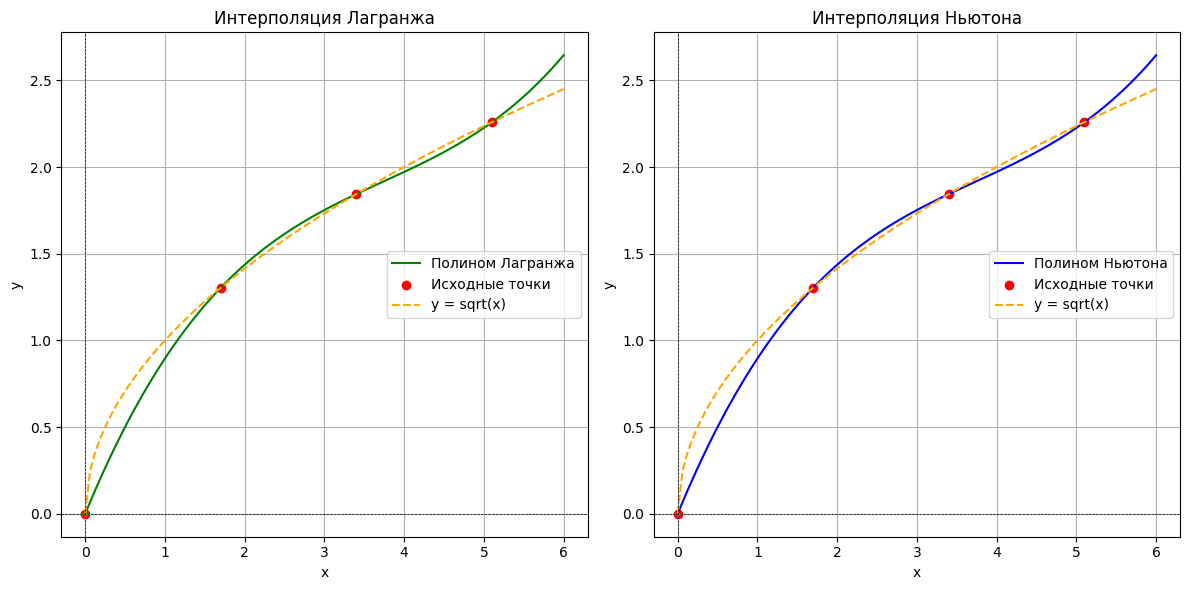

In [11]:
x_range = np.linspace(0, 6, 100)
y_lagrange = [lagrange_polynomial(x_points, y_points, x) for x in x_range]
y_newton = [newton_polynomial(x_points, y_points, x) for x in x_range]
y_true = np.sqrt(x_range)


plt.figure(figsize=(12, 6))

# Полином Лагранжа
plt.subplot(1, 2, 1)
plt.plot(x_range, y_lagrange, label='Полином Лагранжа', color='green')
plt.scatter(x_points, y_points, color='red', label='Исходные точки')
plt.plot(x_range, y_true, label='y = sqrt(x)', color='orange', linestyle='--')
plt.title('Интерполяция Лагранжа')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid()
plt.legend()

# Полином Ньютона
plt.subplot(1, 2, 2)
plt.plot(x_range, y_newton, label='Полином Ньютона', color='blue')
plt.scatter(x_points, y_points, color='red', label='Исходные точки')
plt.plot(x_range, y_true, label='y = sqrt(x)', color='orange', linestyle='--')
plt.title('Интерполяция Ньютона')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()